<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Python_Function_for_Recommending_Metaverse_platform_based_on_Stock_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [ ]:

#!pip install scikit-surprise
!pip install yesg

  Preparing metadata (setup.py) ... done
  Created wheel for yesg: filename=yesg-2.1.1-py3-none-any.whl size=6105 sha256=f33abb1c39f32b5740826d1eed5d5630ea1df5ed5c32b85672c74762afcc2ec5
  Stored in directory: /root/.cache/pip/wheels/2b/53/0e/129a8d67d809bf89a196f3ea3e56b9df3da4975924157cb1a3
Successfully built yesg


In [ ]:
# Import the necessary libraries

import datetime as dt
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


[*********************100%%**********************]  6 of 6 completed


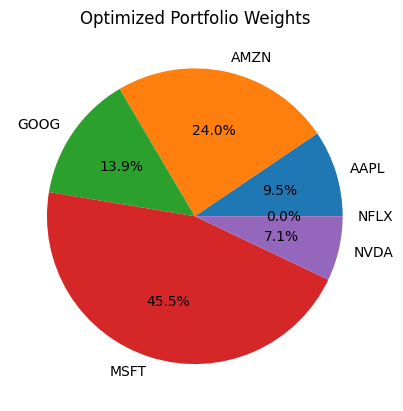

In [ ]:


# Define the list of stock tickers
stock_tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'NVDA', 'NFLX']

# Fetch stock prices data
stock_data = yf.download(stock_tickers, start='2021-01-01', end='2021-12-31')['Adj Close']

# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Calculate expected returns and covariance matrix
mu = np.mean(returns, axis=0)
S = np.cov(returns, rowvar=False)

# Define the objective function and constraints for portfolio optimization
n = len(stock_tickers)
P = matrix(S)
q = matrix(np.zeros(n))
G = matrix(np.vstack((-np.eye(n), np.eye(n))))
h = matrix(np.hstack((np.zeros(n), np.ones(n))))
A = matrix(1.0, (1, n))
b = matrix(1.0)

# Solve the quadratic optimization problem
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
#weights = np.array(sol['x'])

# Flatten the weights array
weights = np.array(sol['x']).flatten()

# Plot the optimized portfolio weights
fig, ax = plt.subplots()
ax.pie(weights, labels=stock_tickers, autopct='%1.1f%%')
plt.title('Optimized Portfolio Weights')
plt.show()

In [ ]:
!pip install yesg


  Preparing metadata (setup.py) ... done
  Created wheel for yesg: filename=yesg-2.1.1-py3-none-any.whl size=6105 sha256=dfc641e2cb2fb90acee8c03f1c56144d3d76ff277147f3b0825a0e551511f4e8
  Stored in directory: /root/.cache/pip/wheels/2b/53/0e/129a8d67d809bf89a196f3ea3e56b9df3da4975924157cb1a3
Successfully built yesg


In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=cf9478ca5348f3c60a46644b0055dc65a8eff27bdf9d095a98a2cca74e43b5cd
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
An error has occurred. The ticker symbol might be wrong or you might need to wait to continue.
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0109  0.0000  0.0000  0.0000  0.0042  0.0030  0.0043  
MAE (testset)     0.0109  0.0000  0.0000  0.0000  0.0042  0.0030  0.0043  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


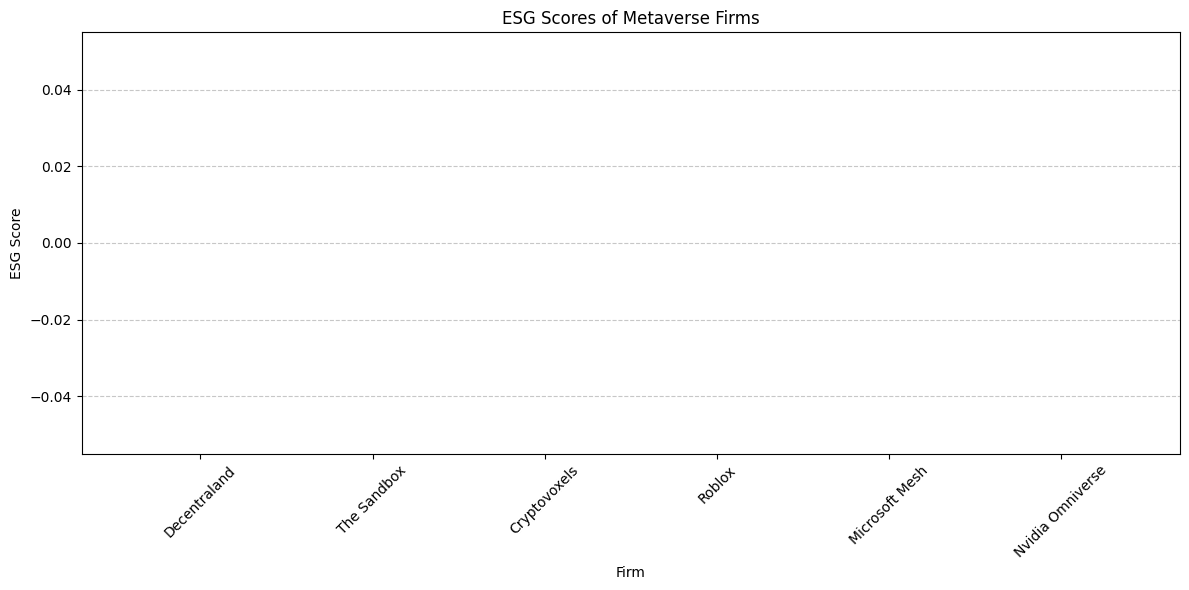

In [ ]:
# Import the necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import yesg
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Define the Metaverse firms along with their ticker symbols
metaverse_firms = {
    'Decentraland': 'MANA',
    'The Sandbox': 'SAND',
    'Cryptovoxels': 'VOX',
    'Roblox': 'RBLX',
    'Microsoft Mesh': 'MSFT',
    'Nvidia Omniverse': 'NVDA'
}

# Function to download historical stock price data for a given ticker symbol
def download_stock_data(ticker_symbol):
    stock_data = yf.download(ticker_symbol, start='2021-01-01', end='2021-12-31')
    return stock_data

# Function to retrieve historic ESG scores for a given firm
def get_historic_esg_score(firm):
    historic_scores = yesg.get_historic_esg(metaverse_firms[firm])
    return historic_scores

# Merge ESG scores for all Metaverse firms
esg_scores = {}
for firm in metaverse_firms:
    esg_scores[firm] = get_historic_esg_score(firm)

# Convert the ESG scores dictionary to a DataFrame with firm names as index
#data = pd.DataFrame.from_dict(esg_scores, orient='index').reset_index()
#data = data.melt(id_vars='index', var_name='Date', value_name='ESG Score')
#data = data.rename(columns={'index': 'Firm'})

# Convert the ESG scores dictionary to a DataFrame with firm names as index
data = pd.DataFrame.from_dict(esg_scores, orient='index').reset_index()
data = data.melt(id_vars='index', var_name='Date', value_name='ESG Score')
data = data.rename(columns={'index': 'Firm'})

# Handle NoneType entries and ensure the 'ESG Score' column is in the correct format
data['ESG Score'] = pd.to_numeric(data['ESG Score'], errors='coerce').fillna(0)

# Build a dataset for the recommendation system
reader = Reader(rating_scale=(0, 100))
data = Dataset.load_from_df(data, reader)

# Build and train the recommendation algorithm (SVD)
model = SVD()
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Your recommendation app is now ready to provide insights based on ESG scores and historical stock prices!



import matplotlib.pyplot as plt

# Extracting the ESG scores data from the DatasetAutoFolds object
esg_scores_data = data.build_full_trainset().build_testset()

# Convert the ESG scores data to a DataFrame for plotting
esg_scores_df = pd.DataFrame(esg_scores_data, columns=['Firm', 'Date', 'ESG Score'])

# Plotting the ESG scores of the Metaverse firms
plt.figure(figsize=(12, 6))
plt.bar(esg_scores_df['Firm'], esg_scores_df['ESG Score'], color='skyblue')
plt.xlabel('Firm')
plt.ylabel('ESG Score')
plt.title('ESG Scores of Metaverse Firms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

### First, download historical stock price data for the specified tickers, calculate the daily returns based on the Adjusted Close prices, and then combine the returns data into a single DataFrame. Finally, we plot candlestick charts for the individual firm returns in a single plot using the mplfinance library.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


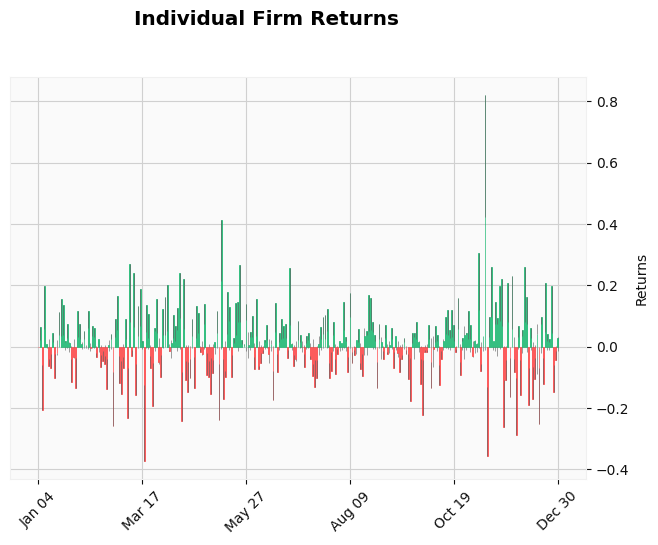

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'META', 'NVDA', 'RBLX']

# Fetch historical stock price data for each ticker
stock_data = {ticker: yf.download(ticker, start='2021-01-01', end='2021-12-31') for ticker in tickers}

# Calculate daily returns for each firm
returns_data = {ticker: data['Adj Close'].pct_change() for ticker, data in stock_data.items()}

# Combine returns data into a single DataFrame
returns_df = pd.concat(returns_data, axis=1)
returns_df.columns = tickers  # Rename columns to match the tickers

# Add additional columns required for plotting
returns_df['Open'] = 0  # Placeholder value for 'Open' column
returns_df['High'] = returns_df.max(axis=1)
returns_df['Low'] = returns_df.min(axis=1)
returns_df['Close'] = returns_df.sum(axis=1)

# Plot candlestick chart for individual firm returns
mpf.plot(returns_df, type='candle', ylabel='Returns', style='yahoo', title='Individual Firm Returns')

plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


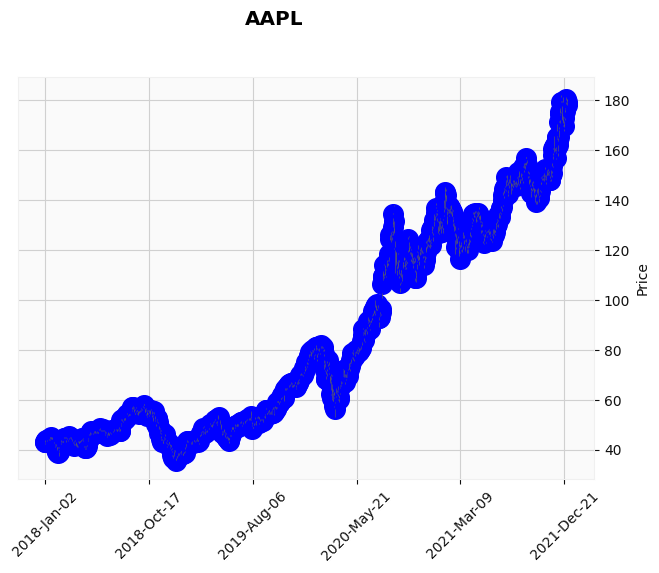

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


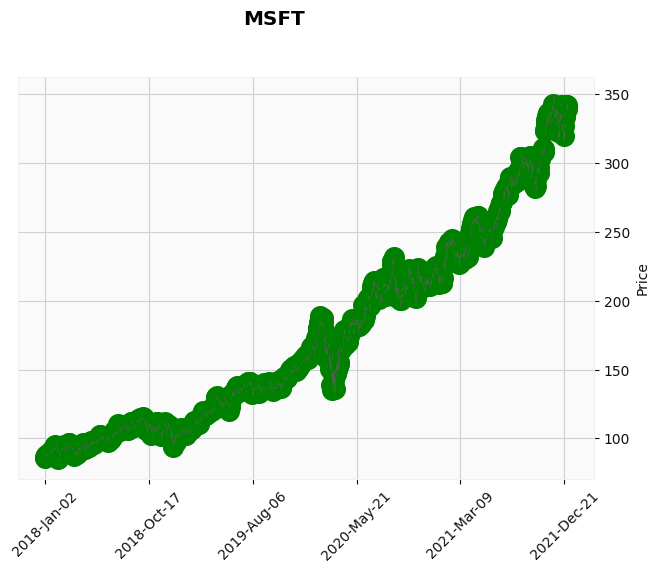

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


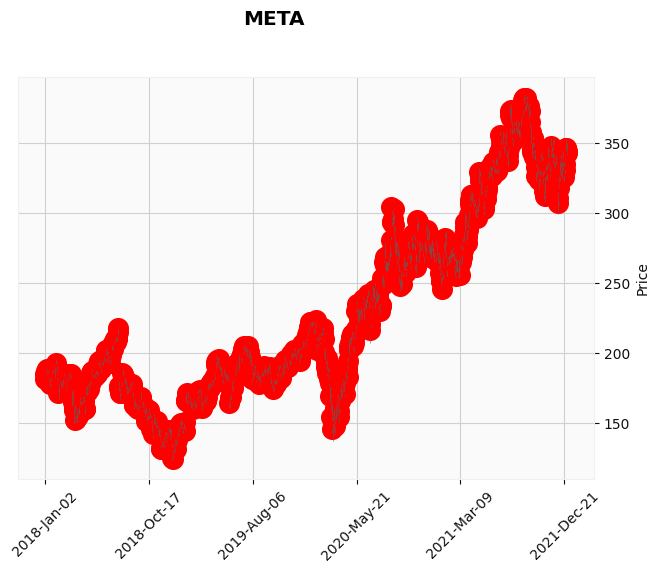

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


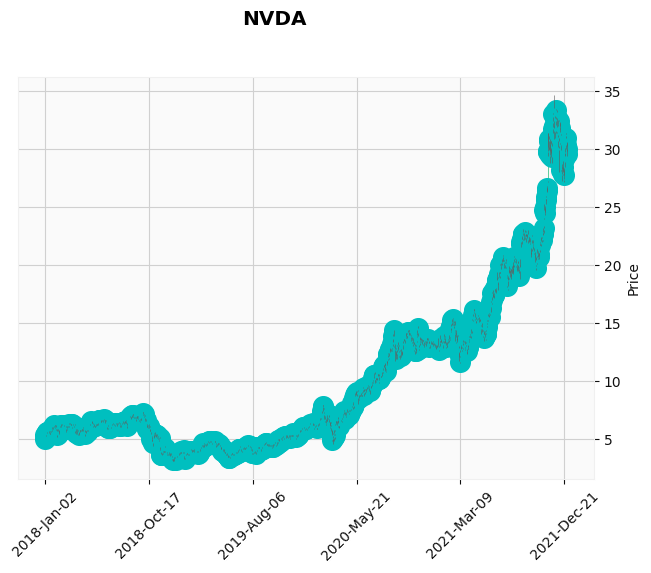

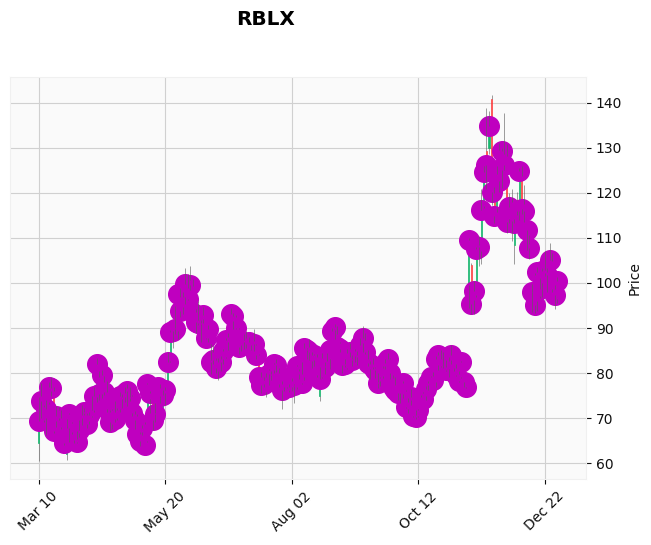

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'META', 'NVDA', 'RBLX']

# Fetch historical stock price data for each ticker
stock_data = {ticker: yf.download(ticker, start='2018-01-01', end='2021-12-31') for ticker in tickers}

# Create a list of colors for each company
colors = ['b', 'g', 'r', 'c', 'm']

# Plot candlestick charts for each company with different colors
for i, ticker in enumerate(tickers):
    add_plot = mpf.make_addplot(stock_data[ticker]['Close'], type='scatter', markersize=200, color=colors[i])
    mpf.plot(stock_data[ticker], type='candle', ylabel='Price', style='yahoo', title=ticker, addplot=add_plot)

plt.show()

In [2]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


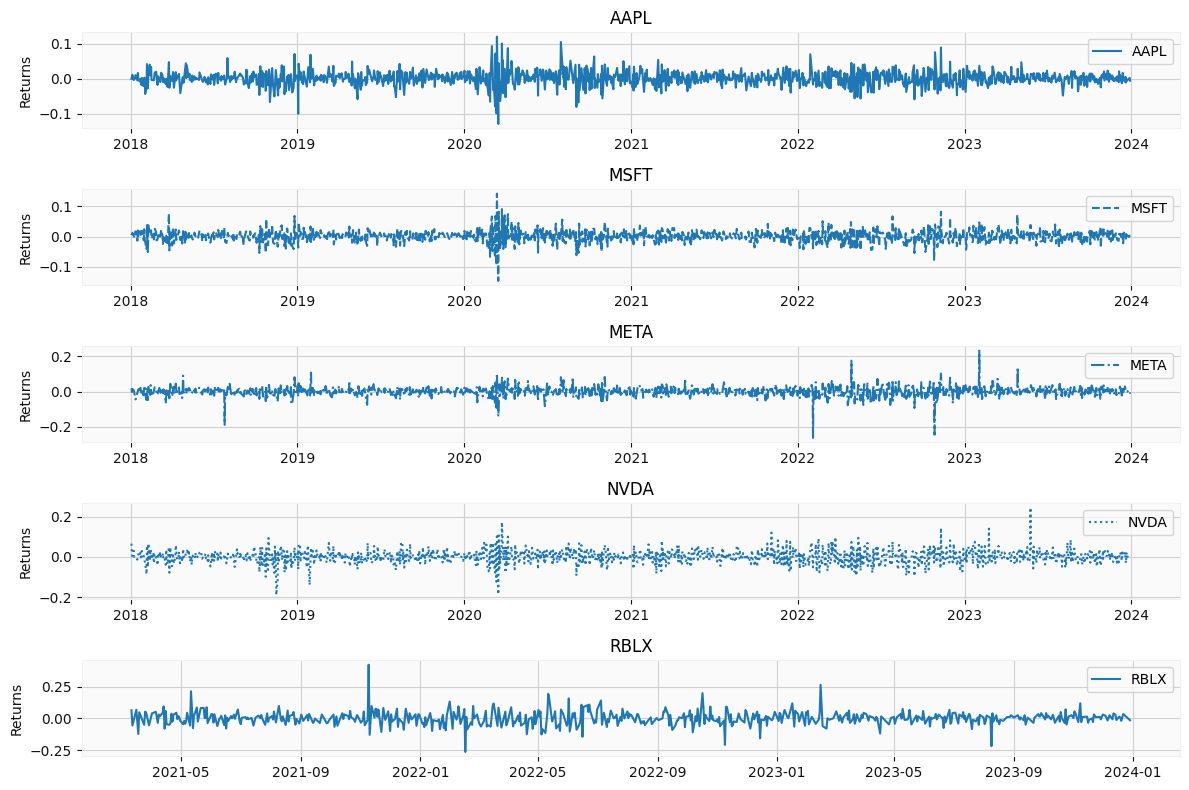

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'META', 'NVDA', 'RBLX']

# Fetch historical stock price data for each ticker
stock_data = {ticker: yf.download(ticker, start='2018-01-01', end='2023-12-31') for ticker in tickers}

# Calculate daily returns for each firm
returns_data = {ticker: data['Adj Close'].pct_change() for ticker, data in stock_data.items()}

# Create separate subplots for each company's return with different line styles
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(12, 8))

line_styles = ['-', '--', '-.', ':', '-']  # Define line styles for each company

for i, (ticker, linestyle) in enumerate(zip(tickers, line_styles)):
    axes[i].plot(returns_data[ticker], linestyle=linestyle, label=ticker)
    axes[i].set_ylabel('Returns')
    axes[i].set_title(ticker)
    axes[i].legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


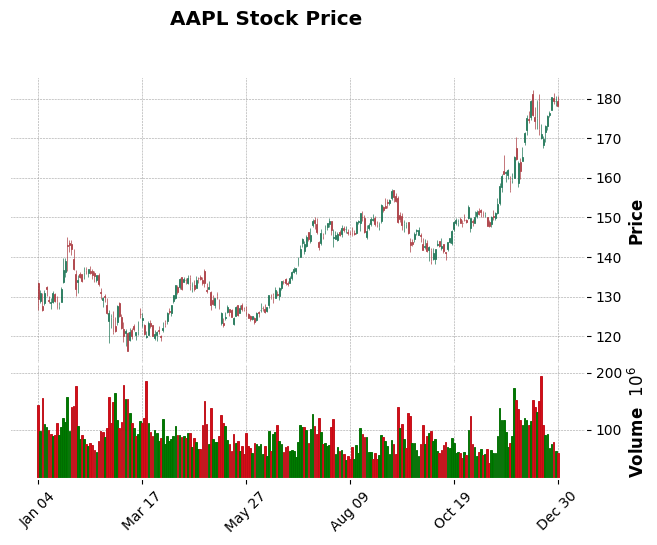

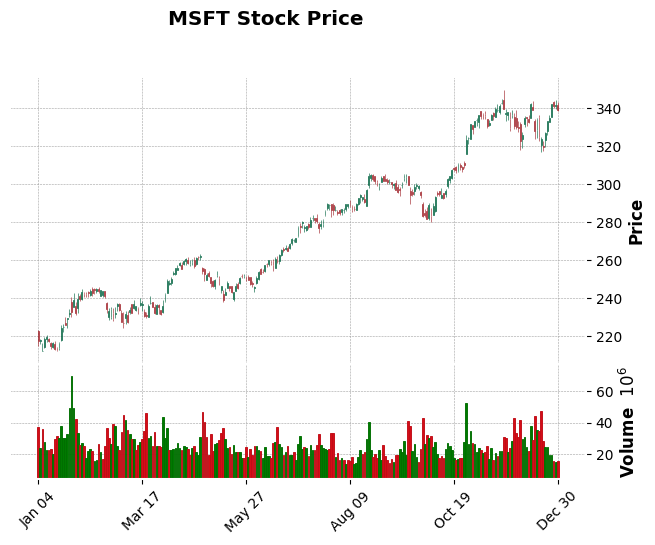

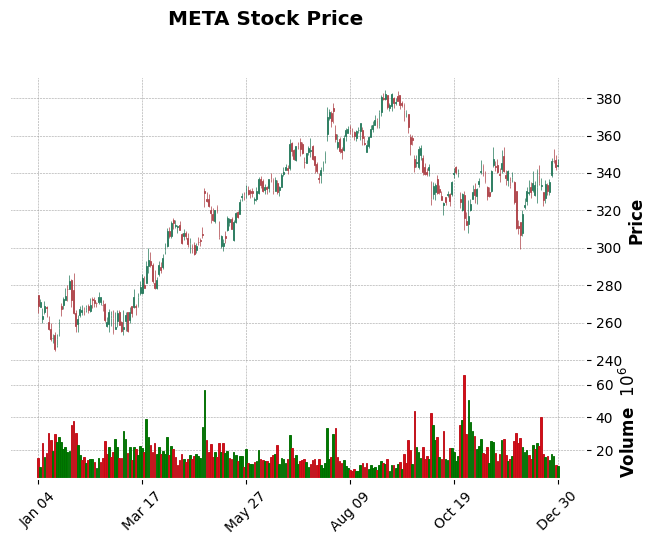

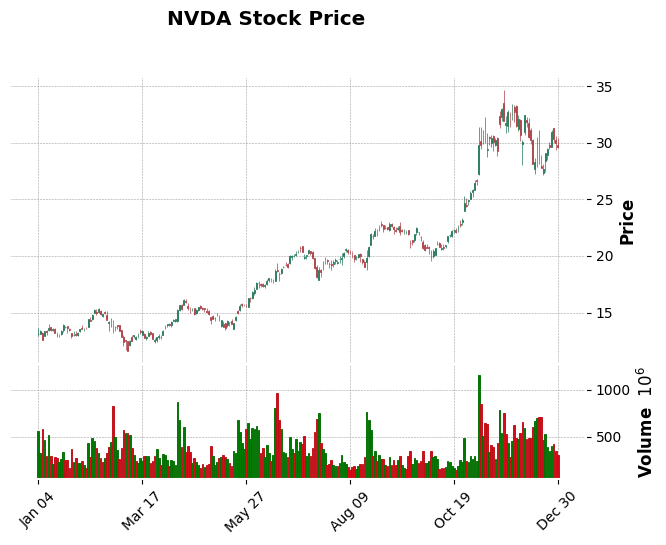

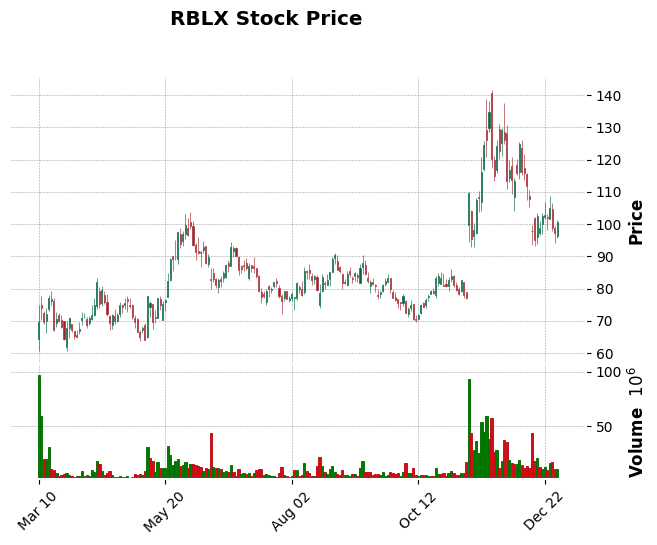

In [6]:
import yfinance as yf
import mplfinance as mpf

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'META', 'NVDA', 'RBLX']

# Fetch historical stock price data for each ticker
stock_data = {ticker: yf.download(ticker, start='2021-01-01', end='2021-12-31') for ticker in tickers}

# Plot candlestick charts for each stock
for ticker, data in stock_data.items():
    mpf.plot(data, type='candle', volume=True, title=f'{ticker} Stock Price', style='charles')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


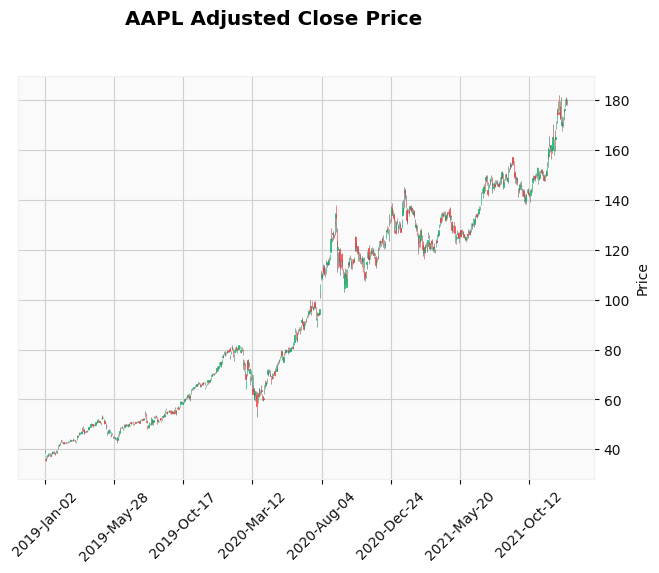

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


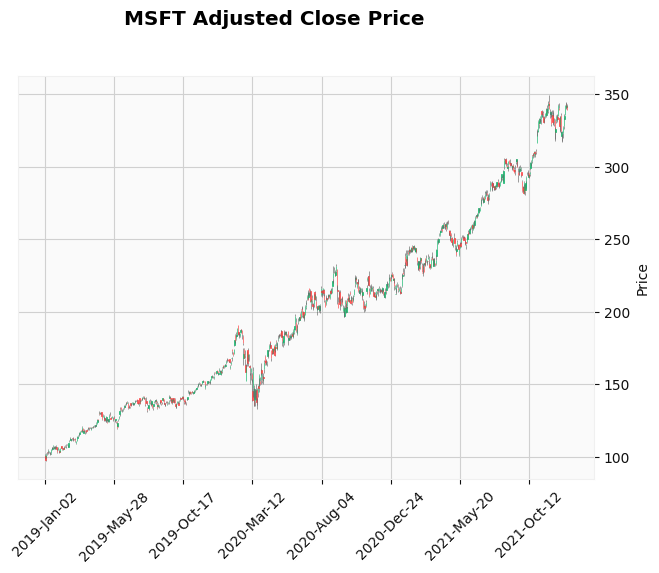

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


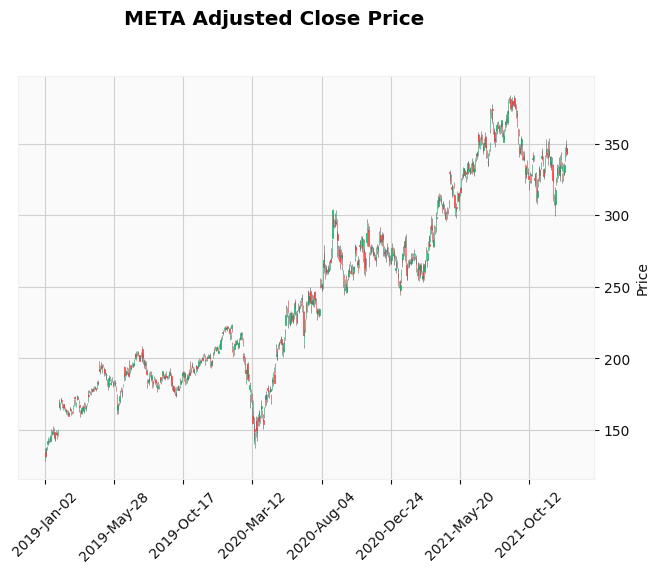

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


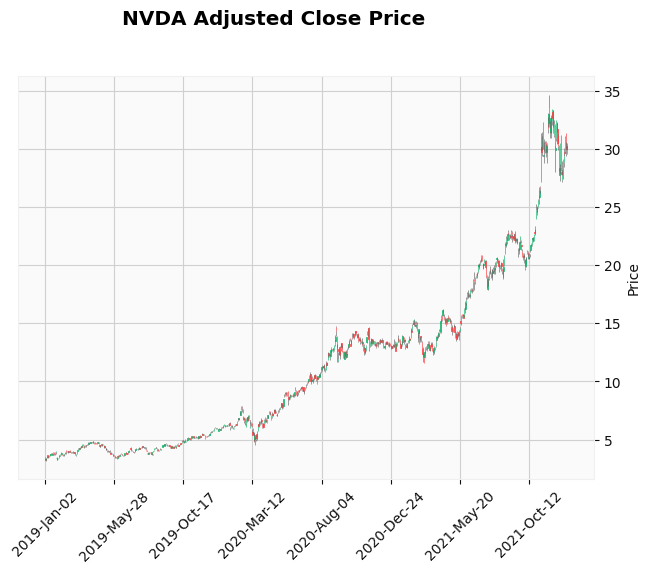

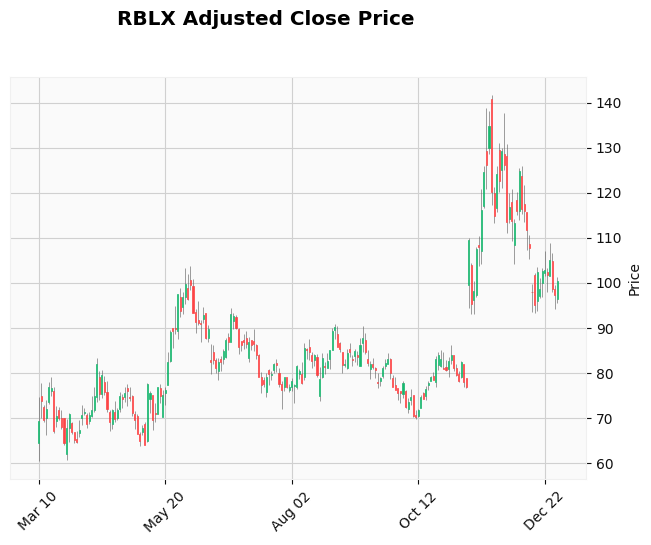

In [8]:
import yfinance as yf
import mplfinance as mpf

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'META', 'NVDA', 'RBLX']

# Fetch historical stock price data for each ticker
stock_data = {ticker: yf.download(ticker, start='2019-01-01', end='2021-12-31') for ticker in tickers}

# Plot candlestick charts for Adjusted Close prices for each stock
for ticker, data in stock_data.items():
    mpf.plot(data, type='candle', volume=False, ylabel='Price', style='yahoo', title=f'{ticker} Adjusted Close Price')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


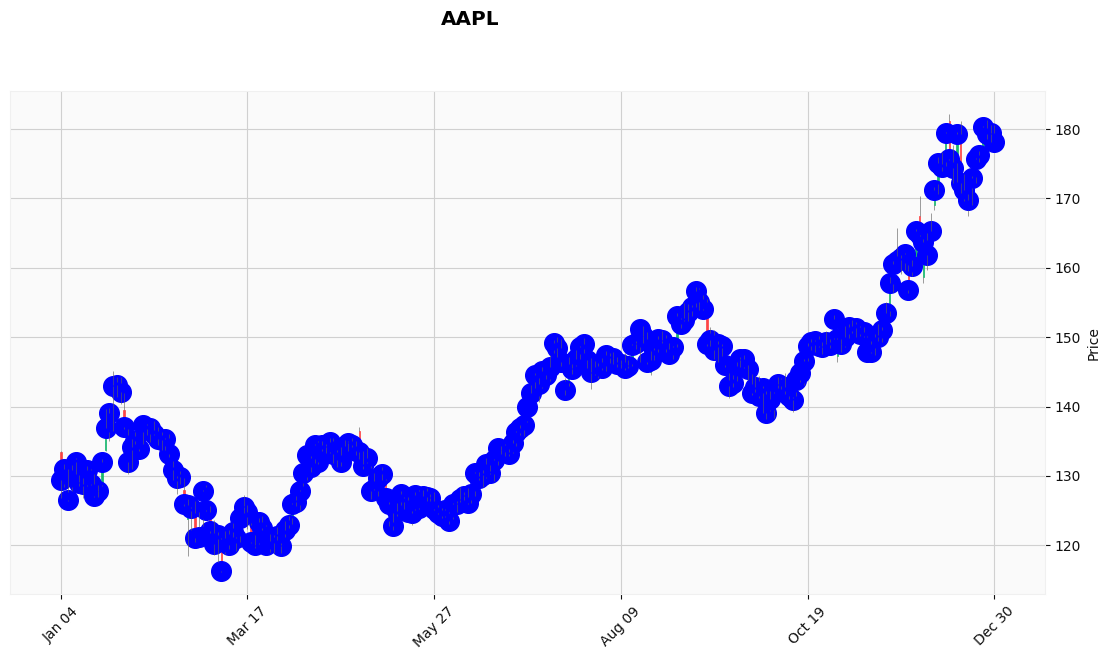

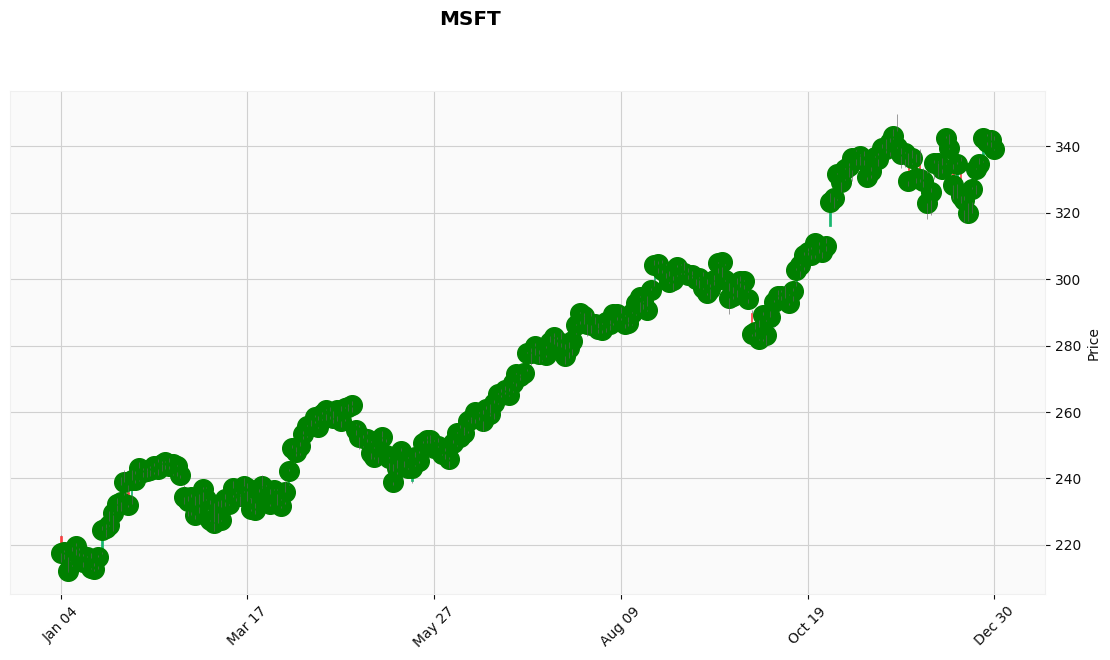

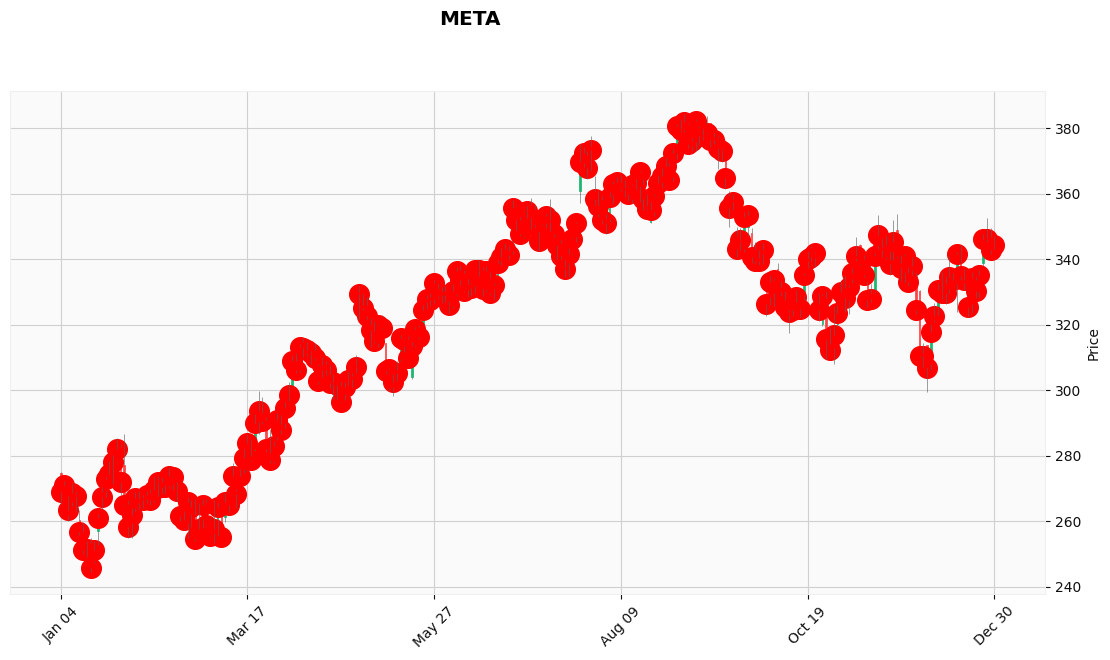

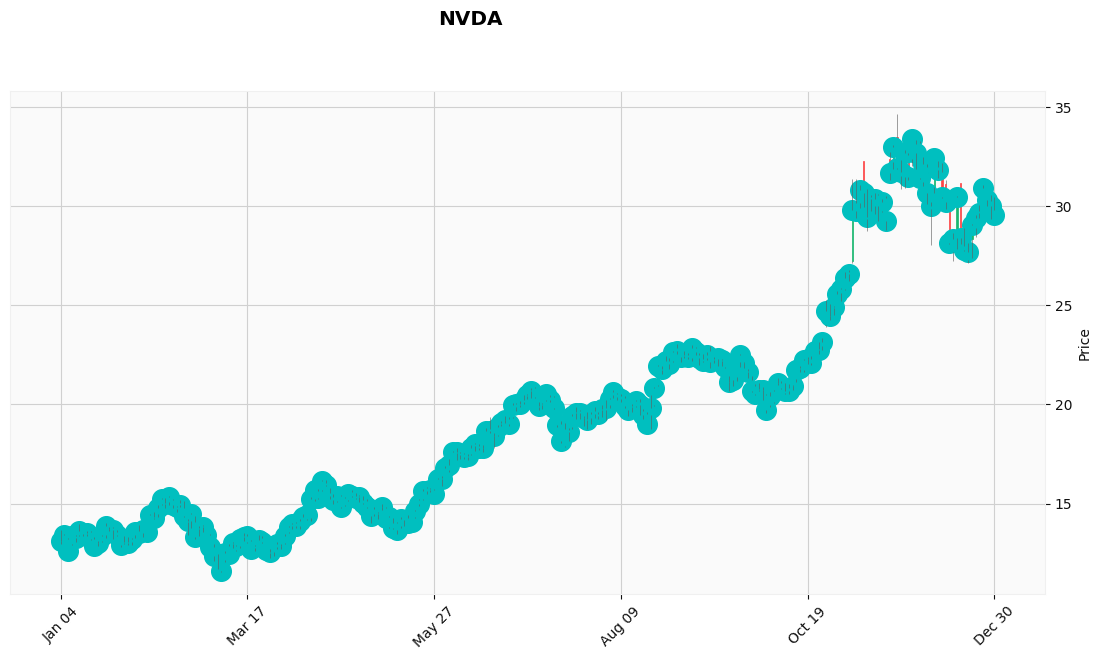

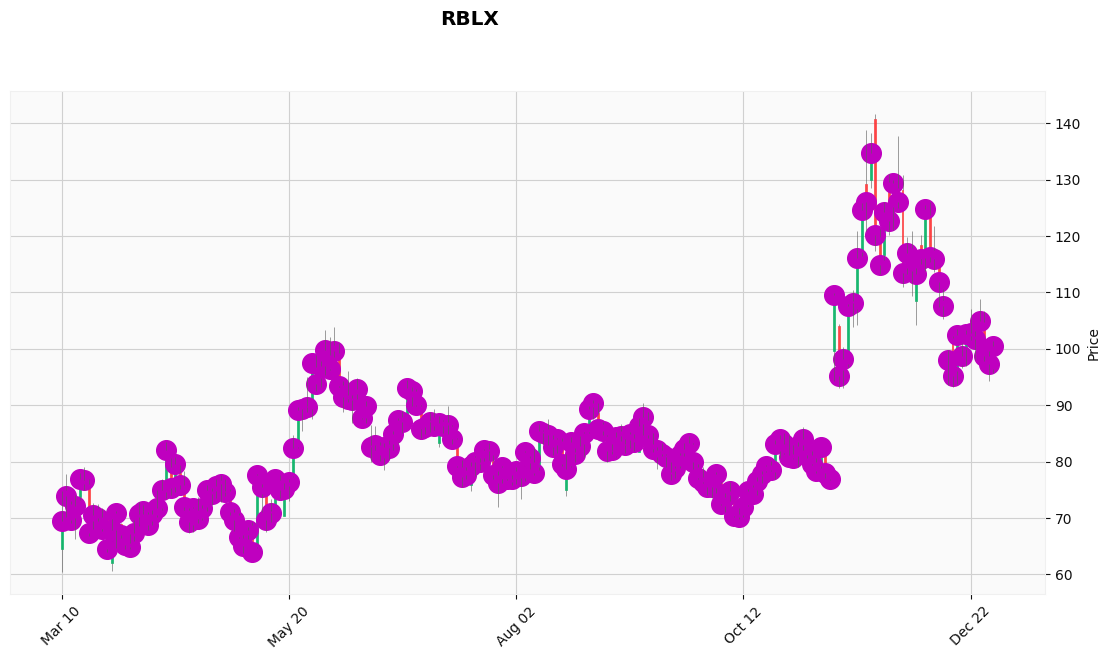

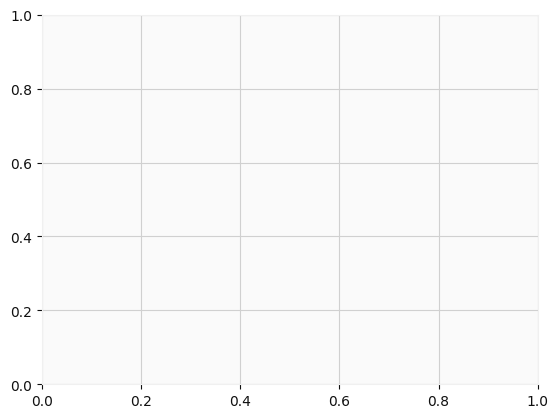

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# List of stock tickers
tickers = ['AAPL', 'MSFT', 'META', 'NVDA', 'RBLX']

# Fetch historical stock price data for each ticker
stock_data = {ticker: yf.download(ticker, start='2021-01-01', end='2021-12-31') for ticker in tickers}

# Create a list of colors for each company
colors = ['b', 'g', 'r', 'c', 'm']

# Plot candlestick charts for each company with different colors and improved visibility
for i, ticker in enumerate(tickers):
    add_plot = mpf.make_addplot(stock_data[ticker]['Close'], type='scatter', markersize=200, color=colors[i])
    mpf.plot(stock_data[ticker], type='candle', ylabel='Price', style='yahoo', title=ticker, addplot=add_plot, figratio=(16, 8), figscale=1.25)

plt.grid(True)  # Show grid lines on the plot

plt.show()


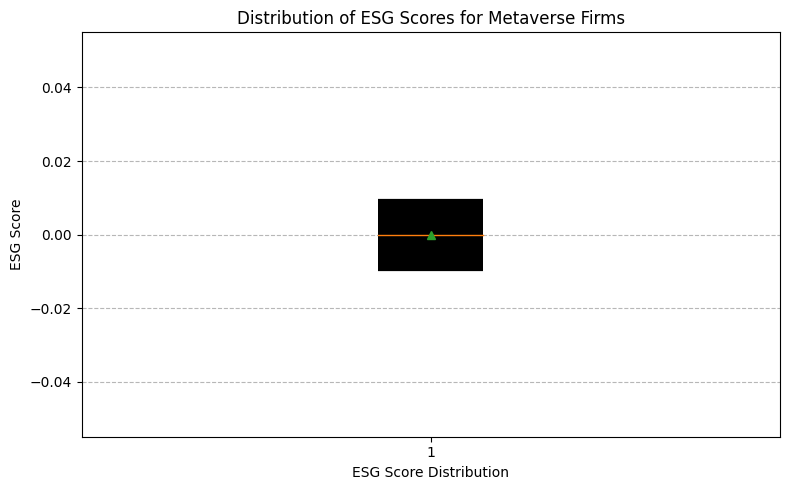

In [ ]:
import matplotlib.pyplot as plt

# Extracting the ESG scores data from the DatasetAutoFolds object for plotting
esg_scores_data = []
for _, _, esg_score in data.build_full_trainset().build_testset():
    esg_scores_data.append(esg_score)

# Create a DataFrame from the ESG scores data for plotting
esg_scores_df = pd.DataFrame({'ESG Score': esg_scores_data})

# Creating a box plot with a reasonable size inside a larger figure
plt.figure(figsize=(8, 5))
box = plt.boxplot(esg_scores_df['ESG Score'], patch_artist=True, showmeans=True)
for box_part in box['boxes']:
    box_part.set_linewidth(52)  # Increase the width of the box lines

plt.xlabel('ESG Score Distribution')
plt.ylabel('ESG Score')
plt.title('Distribution of ESG Scores for Metaverse Firms')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()

# Display the adjusted box plot
plt.show()

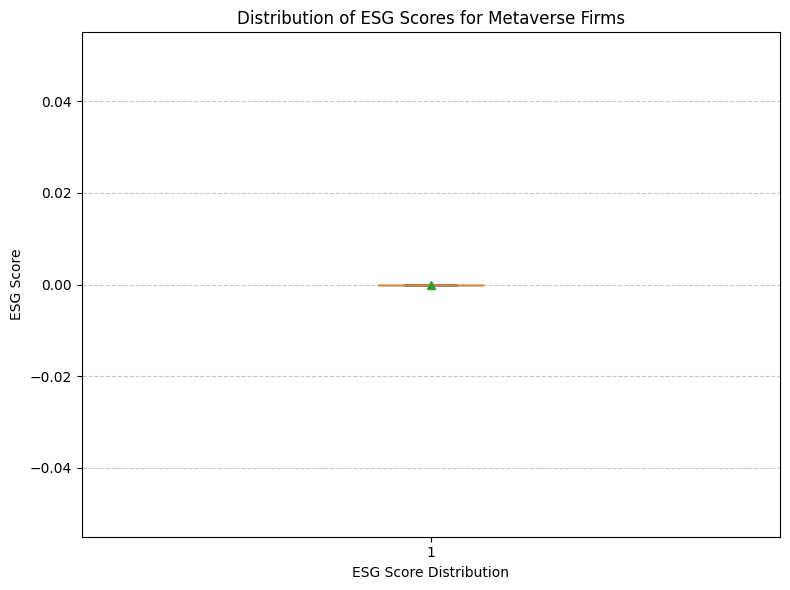

In [ ]:
import matplotlib.pyplot as plt

# Extracting the ESG scores data from the DatasetAutoFolds object for plotting
esg_scores_data = []
for _, _, esg_score in data.build_full_trainset().build_testset():
    esg_scores_data.append(esg_score)

# Create a DataFrame from the ESG scores data for plotting
esg_scores_df = pd.DataFrame({'ESG Score': esg_scores_data})

# Creating a box plot to visualize the distribution of ESG scores
plt.figure(figsize=(8, 6))
plt.boxplot(esg_scores_df['ESG Score'], patch_artist=True, showmeans=True)
plt.xlabel('ESG Score Distribution')
plt.ylabel('ESG Score')
plt.title('Distribution of ESG Scores for Metaverse Firms')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the box plot
plt.show()

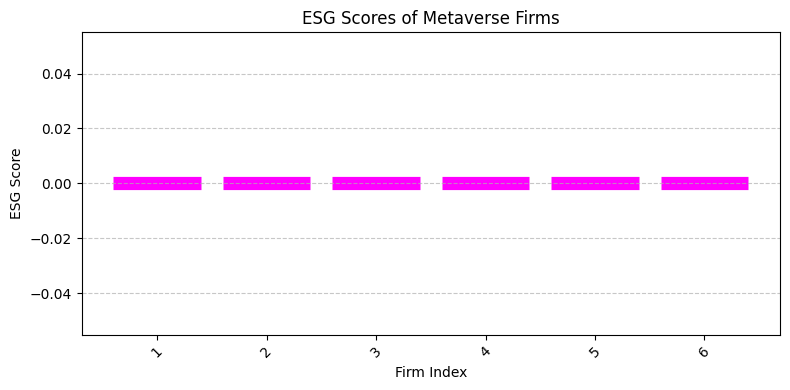

In [ ]:
import matplotlib.pyplot as plt

# Extracting the ESG scores data from the DatasetAutoFolds object for plotting
esg_scores_data = []
for _, _, esg_score in data.build_full_trainset().build_testset():
    esg_scores_data.append(esg_score)

# Create a DataFrame from the ESG scores data for plotting
esg_scores_df = pd.DataFrame({'ESG Score': esg_scores_data})

# Plotting the ESG scores of the Metaverse firms with improved visibility
plt.figure(figsize=(8, 4))
plt.bar(range(len(esg_scores_df)), esg_scores_df['ESG Score'], color='blue', edgecolor='magenta', linewidth=9.5)
plt.xlabel('Firm Index')
plt.ylabel('ESG Score')
plt.title('ESG Scores of Metaverse Firms')
plt.xticks(range(len(esg_scores_df)), range(1, len(esg_scores_df)+1), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot with enhanced bar visibility
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


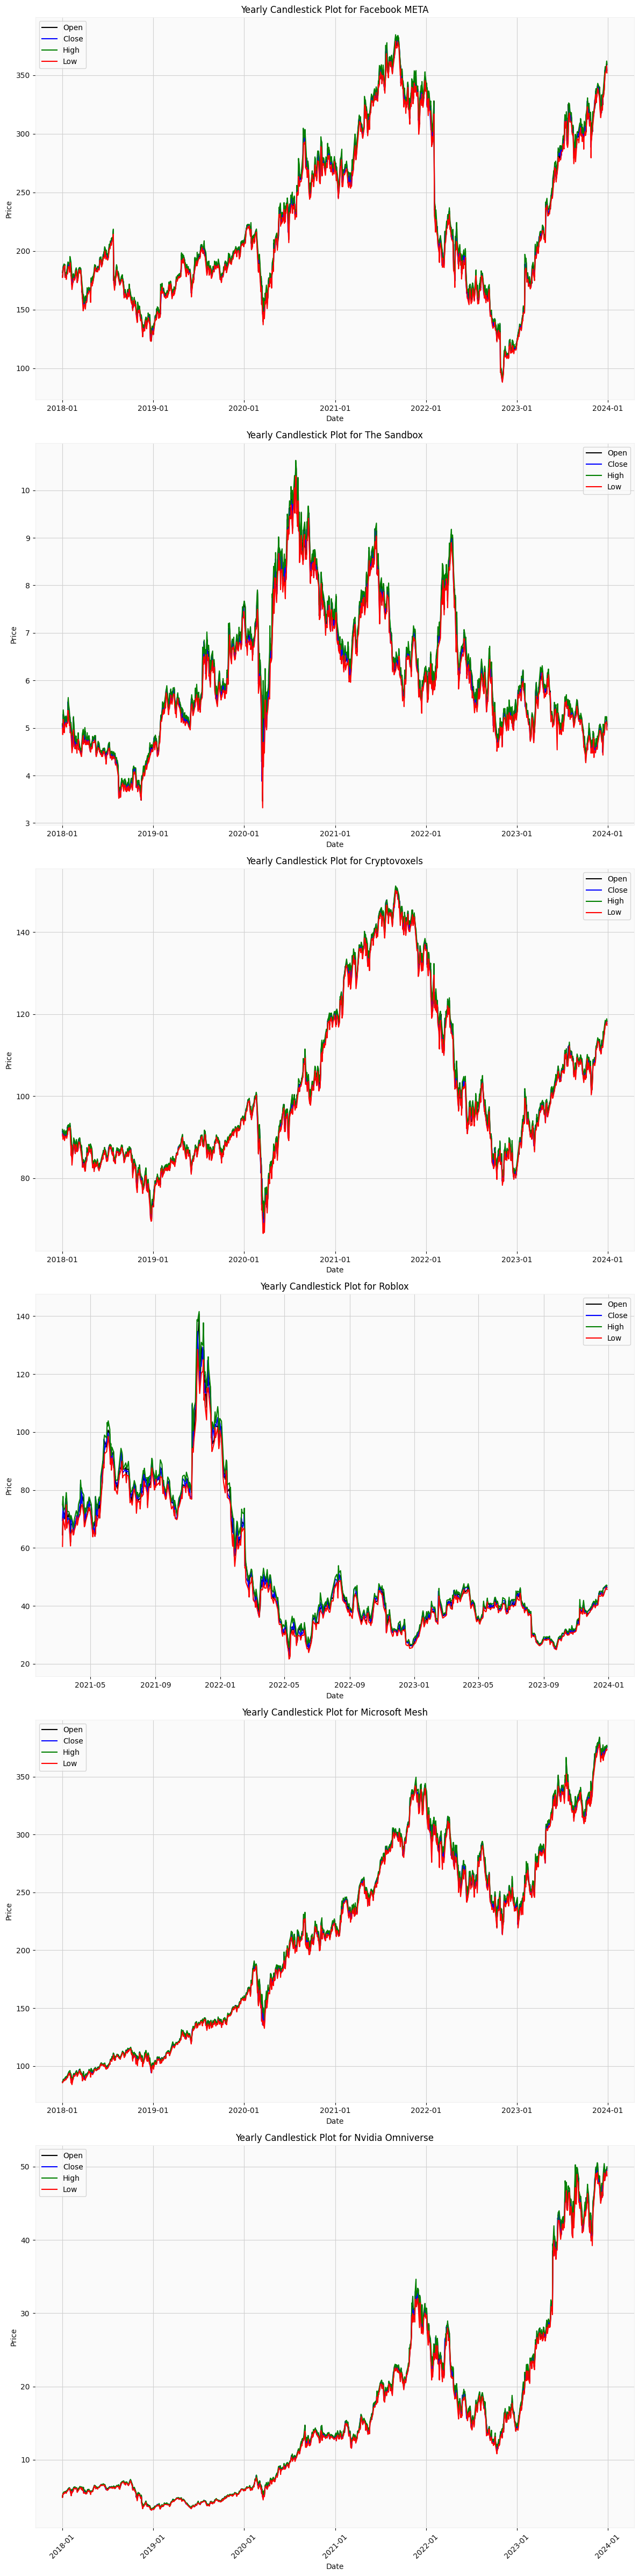

In [23]:
# Import the necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the Metaverse firms along with their ticker symbols
metaverse_firms = {
    'Facebook META': 'META',
    'The Sandbox': 'SAND',
    'Cryptovoxels': 'VOX',
    'Roblox': 'RBLX',
    'Microsoft Mesh': 'MSFT',
    'Nvidia Omniverse': 'NVDA'
}

# Function to download historical stock price data for a given ticker symbol
def download_stock_data(ticker_symbol):
    stock_data = yf.download(ticker_symbol, start='2018-01-01', end='2023-12-31')
    return stock_data

# Create subplots for each Metaverse firm's yearly candlestick plot
fig, axs = plt.subplots(nrows=len(metaverse_firms), ncols=1, figsize=(12, 8 * len(metaverse_firms)))

for idx, (firm, ticker_symbol) in enumerate(metaverse_firms.items()):
    stock_data = download_stock_data(ticker_symbol)

    # Plot the candlestick chart
    ax = axs[idx]
    stock_data['Date'] = stock_data.index
    ax.plot(stock_data['Date'], stock_data['Open'], color='black', label='Open')
    ax.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Close')
    ax.plot(stock_data['Date'], stock_data['High'], color='green', label='High')
    ax.plot(stock_data['Date'], stock_data['Low'], color='red', label='Low')
    ax.set_title(f'Yearly Candlestick Plot for {firm}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

# Display the candlestick plots
plt.tight_layout()
plt.show()

### we fetch historical stock data and ESG ratings for the metaverse stocks from Yahoo Finance.
### We then prepare the data for the Surprise library by creating a dataset with stock symbols and their corresponding ESG ratings. Next, we build and evaluate a recommendation model using the SVD algorithm provided by Surprise.

In [ ]:
# Import the YESG package
import yesg

# Get historic ESG scores for THE BOEING COMPANY
historic_scores = yesg.get_historic_esg('NVDA')
print("Historic ESG Scores:")
print(historic_scores)

Historic ESG Scores:
            Total-Score  E-Score  S-Score  G-Score
Date                                              
2014-09-01        71.00     76.0    64.00    73.00
2014-10-01        70.00     76.0    64.00    73.00
2014-11-01        71.00     76.0    64.00    73.00
2014-12-01        71.00     76.0    64.00    73.00
2015-01-01        71.00     76.0    64.00    73.00
...                 ...      ...      ...      ...
2023-05-01          NaN      NaN      NaN      NaN
2023-06-01          NaN      NaN      NaN      NaN
2023-07-01          NaN      NaN      NaN      NaN
2023-08-01          NaN      NaN      NaN      NaN
2023-09-01        13.59      2.3     4.95     6.34

[109 rows x 4 columns]


### These recommendations are derived from the historical stock price performance correlation with Decentraland.
### The quest for insightful recommendations continues!

In [ ]:
# Import the necessary libraries
import yfinance as yf

# Define the list of Metaverse firms along with their ticker symbols
metaverse_firms = {
    'Decentraland': 'MANA',
    'The Sandbox': 'SAND',
    'Cryptovoxels': 'VOX',
    'Roblox': 'RBLX',
    'Microsoft Mesh': 'MSFT',
    'Nvidia Omniverse': 'NVDA'
}

# Function to fetch historical stock price data for a given firm
def get_historical_stock_prices(ticker_symbol, period='1mo'):
    stock_data = yf.Ticker(ticker_symbol).history(period=period)
    return stock_data

# Define a function to recommend firms based on historical stock price performance
def recommend_firms_by_stock_performance(target_firm, num_recommendations=3):
    recommendations = []
    target_stock_data = get_historical_stock_prices(metaverse_firms[target_firm])

    for firm, ticker_symbol in metaverse_firms.items():
        if firm != target_firm:
            stock_data = get_historical_stock_prices(ticker_symbol)

            # Compare historical stock prices for recommendation
            similarity_score = target_stock_data['Close'].corr(stock_data['Close'])
            recommendations.append((firm, similarity_score))

    # Sort recommendations based on the similarity score
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Return top recommended firms
    return [firm for firm, _ in recommendations[:num_recommendations]]

# Choose a target firm for recommendation
target_firm = 'Decentraland'

# Get recommended firms based on historical stock price performance
recommendations = recommend_firms_by_stock_performance(target_firm)

# Display the recommended firms
print(f"Recommended firms based on historical stock price for {target_firm}:")
for firm in recommendations:
    print(firm)

Recommended firms based on historical stock price for Decentraland:
Microsoft Mesh
Nvidia Omniverse
The Sandbox


### Python Function for Recommending Metaverse platform based on Stock Performance

In [ ]:
# Define the list of Metaverse firms
metaverse_firms = ['Decentraland', 'The Sandbox', 'Cryptovoxels', 'Somnium Space', 'Roblox', 'Microsoft Mesh', 'Nvidia Omniverse']

# Define some characteristics or features for each firm (for demonstration purposes)
firm_features = {
    'Decentraland': ['Virtual Land', 'NFTs', 'Decentralized'],
    'The Sandbox': ['Game Development', 'Virtual World', 'User-Generated Content'],
    'Cryptovoxels': ['Virtual Reality', 'Blockchain Integration', 'Digital Real Estate'],
    'Somnium Space': ['Social VR', 'Persistent VR World', 'Blockchain Economy'],
    'Roblox': ['User-Generated Games', 'Online Platform', 'Virtual Economy'],
    'Microsoft Mesh': ['Mixed Reality', 'Collaboration Platform', 'HoloLens Integration'],
    'Nvidia Omniverse': ['3D Design', 'Real-time Collaboration', 'Physically Accurate Simulation']
}

# Define a function to recommend similar firms based on firm features
def recommend_similar_firms(target_firm, num_recommendations=3):
    similar_firms = []
    target_features = firm_features.get(target_firm)

    if target_features:
        for firm, features in firm_features.items():
            if firm != target_firm:
                common_features = set(target_features).intersection(features)
                similarity_score = len(common_features) / len(target_features)
                similar_firms.append((firm, similarity_score))

        # Sort similar firms based on similarity score
        similar_firms.sort(key=lambda x: x[1], reverse=True)

        # Return top recommended firms
        return [firm for firm, _ in similar_firms[:num_recommendations]]
    else:
        return "Firm not found in the list of Metaverse firms."

# Choose a target firm for recommendation
target_firm = 'Decentraland'

# Get recommended firms for the target firm
recommendations = recommend_similar_firms(target_firm)

# Display the recommended firms
print(f"Recommended firms for {target_firm}:")
for firm in recommendations:
    print(firm)

Recommended firms for Decentraland:
The Sandbox
Cryptovoxels
Somnium Space


In [ ]:
# Import the YESG package
import yesg

# Get historic ESG scores for THE BOEING COMPANY
historic_scores = yesg.get_historic_esg('BA')
print("Historic ESG Scores:")
print(historic_scores)



Historic ESG Scores:
            Total-Score  E-Score  S-Score  G-Score
Date                                              
2014-09-01         60.0    64.00    51.00    64.00
2014-10-01         60.0    64.00    51.00    64.00
2014-11-01         60.0    64.00    51.00    64.00
2014-12-01         60.0    64.00    51.00    64.00
2015-01-01         62.0    69.00    54.00    64.00
...                 ...      ...      ...      ...
2023-05-01          NaN      NaN      NaN      NaN
2023-06-01          NaN      NaN      NaN      NaN
2023-07-01          NaN      NaN      NaN      NaN
2023-08-01          NaN      NaN      NaN      NaN
2023-09-01         39.6     8.84    22.48     8.29

[109 rows x 4 columns]


In [ ]:
import pandas as pd

# Sample data for metaverse platforms and sustainability ratings
metaverse_platforms_data = {
    'Platform': ['Decentraland', 'The Sandbox', 'Cryptovoxels', 'Somnium Space', 'Roblox', 'Microsoft Mesh', 'Nvidia Omniverse'],
    'Category': ['Virtual World', 'Game Creation', 'Virtual World', 'Virtual World', 'Game Creation', 'Virtual World', 'Virtual World'],
    'Sustainability Rating': [4.2, 3.9, 4.1, 4.0, 3.8, 4.2, 4.3]
}

metaverse_stocks_data = {
    'Stock': ['META', 'RBLX', 'U', 'ZM', 'GOOGL'],
    'Sector': ['Metaverse', 'Metaverse', 'Metaverse', 'Tech', 'Tech'],
    'Sustainability Rating': [4.3, 3.7, 4.2, 3.9, 4.1]
}

# Create DataFrames from the sample data
metaverse_platforms_df = pd.DataFrame(metaverse_platforms_data)
metaverse_stocks_df = pd.DataFrame(metaverse_stocks_data)

# Function to recommend metaverse platforms and stocks based on sustainability ratings
def recommend_metaverse_items(min_rating):
    recommended_platforms = metaverse_platforms_df[metaverse_platforms_df['Sustainability Rating'] >= min_rating]
    recommended_stocks = metaverse_stocks_df[metaverse_stocks_df['Sustainability Rating'] >= min_rating]

    return recommended_platforms, recommended_stocks

# Minimum sustainability rating for recommendation
min_sustainability_rating = 4.0

# Call the recommendation function
recommended_platforms, recommended_stocks = recommend_metaverse_items(min_sustainability_rating)

# Display the recommended items
print("Recommended Metaverse Platforms:")
print(recommended_platforms)
print("\nRecommended Metaverse Stocks:")
print(recommended_stocks)

Recommended Metaverse Platforms:
           Platform       Category  Sustainability Rating
0      Decentraland  Virtual World                    4.2
2      Cryptovoxels  Virtual World                    4.1
3     Somnium Space  Virtual World                    4.0
5    Microsoft Mesh  Virtual World                    4.2
6  Nvidia Omniverse  Virtual World                    4.3

Recommended Metaverse Stocks:
   Stock     Sector  Sustainability Rating
0   META  Metaverse                    4.3
2      U  Metaverse                    4.2
4  GOOGL       Tech                    4.1


# Recommender in Python
### Fetch dataset or historical stock prices from yahoo

In [ ]:
import pandas as pd

# Sample data for metaverse platforms and sustainability ratings
metaverse_platforms_data = {
    'Platform': ['Decentraland', 'The Sandbox', 'Cryptovoxels', 'Somnium Space', 'Roblox'],
    'Category': ['Virtual World', 'Game Creation', 'Virtual World', 'Virtual World', 'Game Creation'],
    'Sustainability Rating': [4.2, 3.9, 4.1, 4.0, 3.8]
}

metaverse_stocks_data = {
    'Stock': ['META', 'RBLX', 'U', 'ZM', 'GOOGL'],
    'Sector': ['Metaverse', 'Metaverse', 'Metaverse', 'Tech', 'Tech'],
    'Sustainability Rating': [4.3, 3.7, 4.2, 3.9, 4.1]
}

# Create DataFrames from the sample data
metaverse_platforms_df = pd.DataFrame(metaverse_platforms_data)
metaverse_stocks_df = pd.DataFrame(metaverse_stocks_data)

# Function to recommend metaverse platforms and stocks based on sustainability ratings
def recommend_metaverse_items(min_rating):
    recommended_platforms = metaverse_platforms_df[metaverse_platforms_df['Sustainability Rating'] >= min_rating]
    recommended_stocks = metaverse_stocks_df[metaverse_stocks_df['Sustainability Rating'] >= min_rating]

    return recommended_platforms, recommended_stocks

# Minimum sustainability rating for recommendation
min_sustainability_rating = 4.0

# Call the recommendation function
recommended_platforms, recommended_stocks = recommend_metaverse_items(min_sustainability_rating)

# Display the recommended items
print("Recommended Metaverse Platforms:")
print(recommended_platforms)
print("\nRecommended Metaverse Stocks:")
print(recommended_stocks)

Recommended Metaverse Platforms:
        Platform       Category  Sustainability Rating
0   Decentraland  Virtual World                    4.2
2   Cryptovoxels  Virtual World                    4.1
3  Somnium Space  Virtual World                    4.0

Recommended Metaverse Stocks:
   Stock     Sector  Sustainability Rating
0   META  Metaverse                    4.3
2      U  Metaverse                    4.2
4  GOOGL       Tech                    4.1


In [ ]:
import pandas as pd
import yfinance as yf

# Sample data for metaverse stocks
metaverse_stocks_data = {
    'Stock': ['META', 'RBLX', 'U', 'ZM', 'GOOGL'],
    'Sector': ['Metaverse', 'Metaverse', 'Metaverse', 'Tech', 'Tech']
}

# Create DataFrame from the sample data
metaverse_stocks_df = pd.DataFrame(metaverse_stocks_data)

# Function to fetch historical stock data and ESG ratings from Yahoo Finance
def fetch_stock_data(stock_symbol):
    stock = yf.Ticker(stock_symbol)
    historical_data = stock.history(period='1y')
    esg_rating = stock.sustainability

    return historical_data, esg_rating

# Fetch historical stock data and ESG ratings for each metaverse stock
for index, row in metaverse_stocks_df.iterrows():
    stock_symbol = row['Stock']
    historical_data, esg_rating = fetch_stock_data(stock_symbol)

    print(f"Stock: {stock_symbol}")
    print("Historical Stock Data:")
    print(historical_data)
    print("\nESG Rating:")
    print(esg_rating)
    print("\n---------------------------------\n")


Stock: META
Historical Stock Data:
                                 Open        High         Low       Close  \
Date                                                                        
2023-08-09 00:00:00-04:00  312.238360  312.986822  302.228930  304.584076   
2023-08-10 00:00:00-04:00  307.308507  311.699478  303.246846  305.113007   
2023-08-11 00:00:00-04:00  301.949509  304.095094  299.744019  301.021423   
2023-08-14 00:00:00-04:00  300.362766  305.582021  297.638354  305.562073   
2023-08-15 00:00:00-04:00  305.512221  306.599982  299.414734  301.330811   
...                               ...         ...         ...         ...   
2024-08-05 00:00:00-04:00  451.350006  483.480011  450.799988  475.730011   
2024-08-06 00:00:00-04:00  479.000000  502.559998  478.649994  494.089996   
2024-08-07 00:00:00-04:00  503.130005  510.149994  486.859985  488.920013   
2024-08-08 00:00:00-04:00  497.500000  509.959991  494.720001  509.630005   
2024-08-09 00:00:00-04:00  507.739990  51

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RBLX?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=RBLX&crumb=DrFZk2q2vGO


Stock: RBLX
Historical Stock Data:
                                Open       High        Low      Close  \
Date                                                                    
2023-08-09 00:00:00-04:00  32.439999  32.520000  29.070000  29.459999   
2023-08-10 00:00:00-04:00  30.059999  31.170000  30.000000  30.610001   
2023-08-11 00:00:00-04:00  30.120001  30.299999  29.639999  29.830000   
2023-08-14 00:00:00-04:00  29.520000  30.605000  29.350000  30.540001   
2023-08-15 00:00:00-04:00  30.170000  30.375999  29.760000  29.770000   
...                              ...        ...        ...        ...   
2024-08-05 00:00:00-04:00  36.599998  37.290001  35.299999  36.529999   
2024-08-06 00:00:00-04:00  36.959999  38.110001  36.180000  37.669998   
2024-08-07 00:00:00-04:00  38.110001  38.700001  36.070000  36.180000   
2024-08-08 00:00:00-04:00  36.490002  37.320000  36.320000  37.169998   
2024-08-09 00:00:00-04:00  37.330002  37.549999  36.770000  37.110001   

               

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/U?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=U&crumb=DrFZk2q2vGO


Stock: U
Historical Stock Data:
                                Open       High        Low      Close  \
Date                                                                    
2023-08-09 00:00:00-04:00  38.529999  38.720001  37.259998  37.560001   
2023-08-10 00:00:00-04:00  37.810001  38.525002  36.709999  37.090000   
2023-08-11 00:00:00-04:00  36.380001  37.000000  36.009998  36.630001   
2023-08-14 00:00:00-04:00  35.880001  36.560001  35.220001  36.540001   
2023-08-15 00:00:00-04:00  36.200001  36.320000  35.060001  35.320000   
...                              ...        ...        ...        ...   
2024-08-05 00:00:00-04:00  13.960000  14.885000  13.910000  14.480000   
2024-08-06 00:00:00-04:00  14.700000  14.710000  14.100000  14.250000   
2024-08-07 00:00:00-04:00  14.250000  14.850000  13.895000  13.930000   
2024-08-08 00:00:00-04:00  14.030000  14.565000  13.940000  14.360000   
2024-08-09 00:00:00-04:00  14.800000  16.480000  14.680000  15.265000   

                  

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ZM?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ZM&crumb=DrFZk2q2vGO


Stock: ZM
Historical Stock Data:
                                Open       High        Low      Close  \
Date                                                                    
2023-08-09 00:00:00-04:00  67.510002  67.610001  66.150002  66.550003   
2023-08-10 00:00:00-04:00  67.809998  68.789001  66.974998  67.470001   
2023-08-11 00:00:00-04:00  66.550003  67.250000  66.230003  66.599998   
2023-08-14 00:00:00-04:00  66.199997  67.559998  65.589996  67.550003   
2023-08-15 00:00:00-04:00  67.000000  67.410004  65.949997  66.059998   
...                              ...        ...        ...        ...   
2024-08-05 00:00:00-04:00  56.630001  56.869999  55.599998  55.630001   
2024-08-06 00:00:00-04:00  55.880001  56.680000  55.610001  55.830002   
2024-08-07 00:00:00-04:00  56.490002  57.430000  55.619999  55.720001   
2024-08-08 00:00:00-04:00  56.360001  56.570000  56.000000  56.209999   
2024-08-09 00:00:00-04:00  56.169998  56.529999  55.549999  55.930000   

                 